
study_time	Marks
600          90
550          88
500	         85
450	         77
400	         71
350	         67


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('marks.csv')
df

,study_time,Marks
0,600,90
1,550,88
2,500,85
3,450,77
4,400,71
5,350,67


Text(0, 0.5, 'Marks')

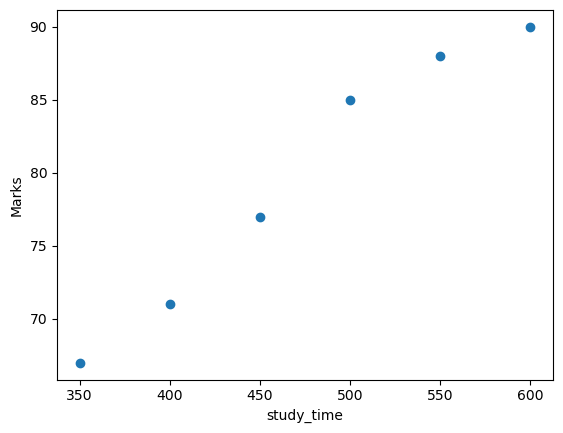

In [3]:
plt.scatter(df.study_time,df.Marks)
plt.xlabel('study_time')
plt.ylabel('Marks')

In [4]:
from sklearn import linear_model

In [427]:
# this part is for the demo of how to fit the model and finding coefficient and intercept
# the train test split is carried out in the next example

In [ ]:
# reg = linear_model.LinearRegression()
# reg.fit(df[['study_time']],df.Marks)

In [5]:
X = df['study_time'].values.reshape(-1,1)   # reshape for transforming 1D array into 2D array
y = df['Marks']
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [6]:
new_one = 540
y_pred = reg.predict([[new_one]])
y_pred

array([86.12952381])

In [7]:
reg.coef_   #this is m

array([0.09942857])

In [8]:
reg.intercept_    #this is c

32.43809523809524

In [9]:
# y = mx+c
0.09942857*540+32.43809523809524

86.12952303809524

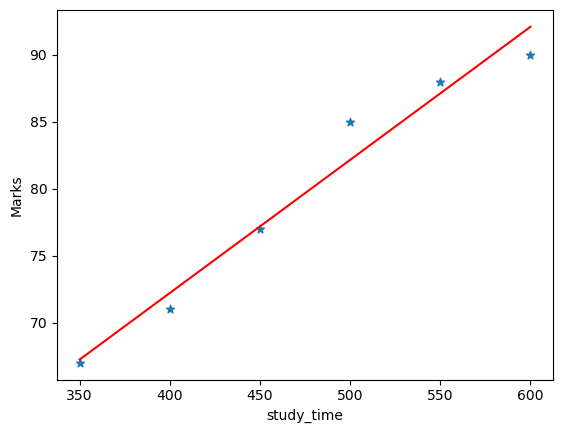

In [10]:
plt.scatter(df.study_time,df.Marks, marker = '*')
plt.xlabel('study_time')
plt.ylabel('Marks')
plt.plot(df.study_time,reg.predict(X), color = 'red')

In [212]:
# dataset: Student_Performance.csv focus on carrying the various details realted to the performance index
# the correlation will be interesting to check and decide the relations
# Note: This is just for the demnstration purpose. For Course work and Fyp's make sure to use the well
# correlated data   

In [11]:
df = pd.read_csv('Student_Performance.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [174]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [13]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### In the earlier example there was no train test split
##### In this case, we have selected only one feature for demo purpose
##### We guess this will generate some less score obviously 

In [18]:
X=df[['Hours Studied']]
y=df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape,y_train.shape

((8000, 1), (8000,))

In [20]:
X_test.shape,y_test.shape

((2000, 1), (2000,))

In [21]:
linear=LinearRegression()

In [22]:
linear.fit(X_train,y_train)

LinearRegression()

In [23]:
slope = linear.coef_[0]     # Slope (m)
intercept = linear.intercept_  # Intercept (c)
print(slope)
print(intercept)

2.7843004411707626
41.4366348265358


In [24]:
pred=linear.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
r2 = r2_score(y_test, pred)
print(mse,r2)
print("how much away from actual data",root)

321.8145383172104 0.13160425385996788
how much away from actual data 17.93919001285204


In [26]:
# multiple

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
X=df.drop(columns=['Performance Index'])
y=df['Performance Index']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
linear=LinearRegression()

In [31]:
linear.fit(X_train,y_train)

LinearRegression()

In [32]:
pred=linear.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
r2 = r2_score(y_test, pred)
print(mse,r2)
print("how much away from actual data",root)
print(f"score is {linear.score(X_test,y_test)}")

4.082628398521854 0.9889832909573145
how much away from actual data 2.020551508505006
score is 0.9889832909573145


In [34]:
linear.predict([[7,76,1,8,6]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.91168162])

In [35]:
linear.coef_  # array([2.85342921, 1.01858354, 0.47633298, 0.1951983 ])

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

# RIDGE REGRESSION and Lasso Regression

In [46]:
df=pd.read_csv("Student_Performance.csv")
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0


In [47]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [38]:
# x=df[['Hours Studied']]
# y=df['Performance Index']
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
X=df.drop(columns=['Performance Index'])
y=df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
ridge=Ridge()
lasso=Lasso()
linear=LinearRegression()

In [51]:
parameter={'alpha':[1,2,4,6,6.5,6.8,7,8,63.83,1.5,2]}

In [52]:
ridgegrid=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgegrid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 4, 6, 6.5, 6.8, 7, 8, 63.83, 1.5, 2]},
             scoring='neg_mean_squared_error')

In [53]:
ridgegrid.best_params_

{'alpha': 8}

In [54]:
ridgegrid.best_score_

-4.178946332883768

In [55]:
pred=ridgegrid.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
r2 = r2_score(y_test, pred)
print(mse,r2)
print("how much away from actual data",root)

4.082709036182985 0.9889830733617943
how much away from actual data 2.0205714627755644


In [57]:
lassogrid=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassogrid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 4, 6, 6.5, 6.8, 7, 8, 63.83, 1.5, 2]},
             scoring='neg_mean_squared_error')

In [58]:
lassogrid.best_params_

{'alpha': 1}

In [59]:
ridgegrid.best_score_

-4.178946332883768

In [60]:
pred=ridgegrid.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test,pred)
root=root_mean_squared_error(y_test,pred)
r2 = r2_score(y_test, pred)
print(mse,r2)
print("how much away from actual data",root)

4.082628398521854 0.9889832909573145
how much away from actual data 2.020551508505006


In [44]:
# student performance prediction RIDGE

In [43]:
# do it yourself for lasso regression

In [ ]:
# export model
import joblib
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

In [ ]:
import os
os.getcwd